In [37]:
#import packages
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import gensim
import re
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models import FastText
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import nltk
#nltk.download('punkt')


#reading in the cleaned dictionary
df = pd.read_csv('cleaned_dict.csv')

#replace commas with spaces
df['definition'] = df['definition'].str.replace(',', ' ')
#remove any non-alphabetic characters
df['definition'] = df['definition'].str.replace('[^a-zA-Z]', '')

#tokenize the definitions
df['definition'] = df['definition'].apply(word_tokenize)
#remove quotes from the words
df['definition'] = df['definition'].apply(lambda x: [word.replace("'", "") for word in x])

#train the word2vec model
model = Word2Vec(df['definition'], min_count=5, window=5, sg=0)

#save the model
model.save('codenames.model')



In [39]:
#test the model is working by finding the most similar words to "animal"
print(model.wv.most_similar("animal"))

[('organ', 0.8309949636459351), ('living', 0.8246471881866455), ('ovum', 0.8042847514152527), ('invertebrate', 0.7991934418678284), ('vegetable', 0.7885084748268127), ('tissue', 0.7801781296730042), ('internal', 0.779906690120697), ('organism', 0.7770279049873352), ('growth', 0.7742601037025452), ('development', 0.7680203914642334)]


In [41]:
#test the similarity between words
print(model.wv.similarity('king', 'royalty'))

0.6577146


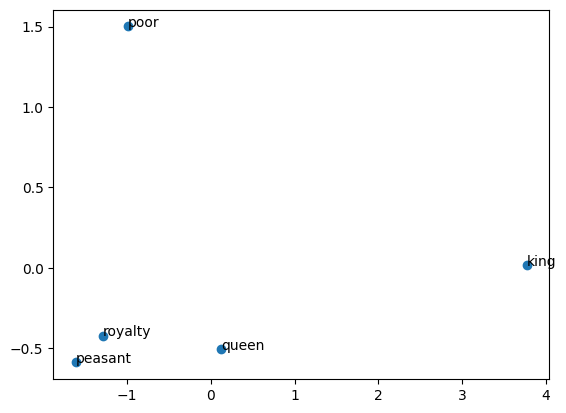

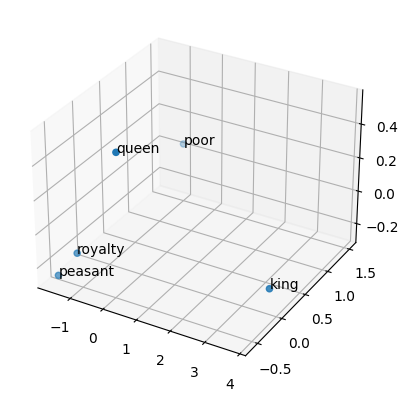

In [47]:
#import packages
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#create a list of the words
words = ['king', 'queen', 'peasant', 'royalty', 'poor']
#find the vectors for each word
vectors = [model.wv[word] for word in words]
#reduce the dimensions to 2
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)
#create a scatter plot
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
#label the points
for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]))
plt.show()

#now plot them in 3D
from mpl_toolkits.mplot3d import Axes3D
#create a list of the words
words = ['king', 'queen', 'peasant', 'royalty', 'poor']
#find the vectors for each word
vectors = [model.wv[word] for word in words]
#reduce the dimensions to 3
pca = PCA(n_components=3)
vectors_3d = pca.fit_transform(vectors)
#create a scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectors_3d[:, 0], vectors_3d[:, 1], vectors_3d[:, 2])
#label the points
for i, word in enumerate(words):
    ax.text(vectors_3d[i, 0], vectors_3d[i, 1], vectors_3d[i, 2], word)
plt.show()

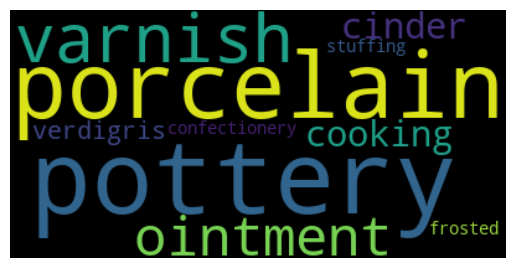

In [59]:
#make a wordcloud of the most similar words to "animal"
from wordcloud import WordCloud
#find the most similar words to "animal"
similar_words = model.wv.most_similar("chocolate")
#convert the similar words to a dictionary
wordcloud_dict = {word: similarity for word, similarity in similar_words}
#create the wordcloud
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(wordcloud_dict)
#plot the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
